In [1]:
import numpy as np
import dezero.layers as L
import dezero.functions as F
from dezero import Model
import dezero
import matplotlib.pyplot as plt
import  dezero.optimizers 

In [2]:
# rnn = L.RNN(10)
# x = np.random.rand(1,1)
# h = rnn(x)
# print(h.shape)

In [3]:
class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.RNN(hidden_size)
        self.fc = L.Linear(out_size)
        
    def reset_state(self):
        self.rnn.reset_state()
        
    def forward(self, x):
        h = self.rnn(x)
        y = self.fc(h)
        return y

In [4]:
# seq_data = [np.random.randn(1,1) for _ in range(1000)]
# xs = seq_data[0:-1]
# ts = seq_data[1:]

In [5]:
# model = SimpleRNN(10, 1)

In [6]:
# loss, cnt = 0, 0

In [7]:
# for x, t in zip(xs, ts):
#     y = model(x)
#     loss += F.mean_squared_error(y, t)
    
#     cnt += 1
#     if cnt == 2:
#         model.cleargrads()
#         loss.backward()
#         break

In [8]:
# train_set = dezero.datasets.SinCurve(train=True)
# print(len(train_set))
# print(train_set[0])
# print(train_set[1])
# print(train_set[2])

In [9]:
# xs = [example[0] for example in train_set]
# ts = [example[1] for example in train_set]
# plt.plot(np.arange(len(xs)), xs, label="xs")
# plt.plot(np.arange(len(ts)), ts, label="ts")
# plt.show()

In [10]:
max_epoch = 100
hidden_size = 100
bptt_length = 30

In [11]:
train_set = dezero.datasets.SinCurve(train=True)
seqlen = len(train_set)

In [12]:
model = SimpleRNN(hidden_size, 1)
optimizer = dezero.optimizers.Adam().setup(model)

In [20]:
for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0,0
    
    for x, t in train_set:
        x = x.reshape(1, 1)
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1
        
        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()
    
    if epoch % 10 == 0:
        avg_loss = float(loss.data) / count
        print("| epoch %d | loss %f" % (epoch +1, avg_loss))

| epoch 1 | loss 0.005375
| epoch 11 | loss 0.004531
| epoch 21 | loss 0.002107
| epoch 31 | loss 0.002541
| epoch 41 | loss 0.040019
| epoch 51 | loss 0.004489
| epoch 61 | loss 0.003616
| epoch 71 | loss 0.002124
| epoch 81 | loss 0.002278
| epoch 91 | loss 0.002881


In [21]:
xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []

In [22]:
with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))

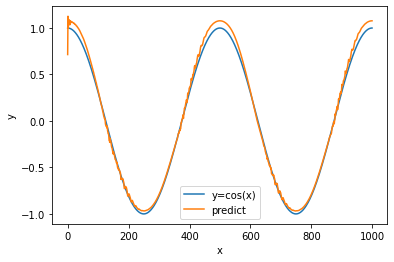

In [23]:
plt.plot(np.arange(len(xs)), xs, label="y=cos(x)")
plt.plot(np.arange(len(xs)), pred_list, label="predict")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()